# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [32]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [33]:
sinasc_exe_1 = sinasc_raw[['DIFDATA','TPMETESTIM']]
sinasc_exe_1

,DIFDATA,TPMETESTIM
0,17,8.0
1,15,8.0
2,11,8.0
3,20,8.0
4,17,8.0
...,...,...
27023,305,8.0
27024,17,2.0
27025,5,1.0
27026,15,2.0


In [34]:
sinasc_raw['munResLat'].value_counts()

-8.76889     8437
-10.88205    2182
-9.90846     1729
-12.74137    1590
-11.43387    1374
-11.72226     927
-10.43595     881
-10.77388     781
-10.72357     631
-11.67754     616
-10.20981     583
-9.42556      500
-11.52855     450
-10.41177     432
-11.93554     367
-11.69949     353
-8.78502      337
-11.17321     304
-12.06380     303
-11.72133     261
-13.19503     237
-12.43601     233
-9.71667      226
-13.13056     214
-11.34413     205
-9.37819      205
-10.26310     199
-11.12855     170
-11.76712     168
-10.56842     166
-11.04561     164
-12.55684     162
-12.13178     154
-12.99752     127
-10.61207     112
-9.19187      109
-10.91553     104
-11.90842      99
-11.70974      98
-10.24873      97
-9.85139       93
-11.19624      84
-10.43105      81
-13.49976      80
-10.33887      75
-10.93217      64
-11.91439      54
-9.70554       50
-12.17983      44
-11.82571      43
-13.47656      40
-11.42684      32
Name: munResLat, dtype: int64

In [35]:
faixa_lat = pd.cut(sinasc_raw['munResLat'],[-20, -10.5, 0])
faixa_lat

0        (-20.0, -10.5]
1        (-20.0, -10.5]
2        (-20.0, -10.5]
3        (-20.0, -10.5]
4        (-20.0, -10.5]
              ...      
27023    (-20.0, -10.5]
27024    (-20.0, -10.5]
27025    (-20.0, -10.5]
27026    (-20.0, -10.5]
27027    (-20.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-20.0, -10.5] < (-10.5, 0.0]]

In [36]:
pd.cut(sinasc_raw['munResLat'],[-20, -10.5, 0]).value_counts()

(-10.5, 0.0]      14034
(-20.0, -10.5]    12993
Name: munResLat, dtype: int64

In [37]:
sinasc_exe_1_2 = sinasc_exe_1.groupby(faixa_lat).aggregate([
    ('soma','sum'),
    ('media','mean'),
    ('mediana','median'),
    ('maximo','max'),
    ('minimo','min'),
    ('desvio_padrao','std'),
    ('variancia','var')
    ])
sinasc_exe_1_2

DIFDATA                                                 \
                  soma      media mediana maximo minimo desvio_padrao   
munResLat                                                               
(-20.0, -10.5]  439510  33.826676    30.0    626      1     26.390274   
(-10.5, 0.0]    429822  30.627191    26.0    652      1     24.471172   

                           TPMETESTIM                                  \
                 variancia       soma     media mediana maximo minimo   
munResLat                                                               
(-20.0, -10.5]  696.446557    90849.0  7.255151     8.0    9.0    1.0   
(-10.5, 0.0]    598.838271    78127.0  5.888822     8.0    9.0    1.0   

                                         
               desvio_padrao  variancia  
munResLat                                
(-20.0, -10.5]      2.066574   4.270729  
(-10.5, 0.0]        3.396540  11.536485

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [38]:
sinasc_raw['munResArea'].value_counts()

34096.394    8437
6896.648     2182
4426.571     1729
11518.915    1590
3792.998     1374
1457.888      927
2944.128      881
24855.724     781
1969.850      631
6240.932      616
3265.809      583
8509.270      500
4518.035      450
10071.643     432
7067.025      367
7460.219      353
6843.868      337
1758.465      304
10959.767     303
1703.008      261
2783.300      237
4987.177      233
2651.822      226
1451.060      214
3029.189      205
3863.943      205
1931.378      199
831.857       170
3773.505      168
3442.005      166
1191.875      164
5126.723      162
3958.273      154
3060.321      127
5067.384      112
4081.583      109
807.126       104
1197.796       99
843.446        98
2197.413       97
3135.106       93
798.083        84
965.676        81
1314.352       80
1961.778       75
459.978        64
541.647        54
1717.640       50
2548.683       44
605.692        43
6014.733       40
892.842        32
Name: munResArea, dtype: int64

In [39]:
faixa_area = pd.cut(sinasc_raw['munResArea'],[0, 3000, 35000])
faixa_area

0        (3000, 35000]
1        (3000, 35000]
2        (3000, 35000]
3        (3000, 35000]
4        (3000, 35000]
             ...      
27023    (3000, 35000]
27024    (3000, 35000]
27025    (3000, 35000]
27026    (3000, 35000]
27027        (0, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 3000] < (3000, 35000]]

In [40]:
pd.cut(sinasc_raw['munResArea'],[0, 3000, 35000]).value_counts()

(3000, 35000]    21808
(0, 3000]         5219
Name: munResArea, dtype: int64

In [41]:
sinasc_exe_2 = sinasc_raw[['CONSPRENAT','ESCMAEAGR1']].groupby(faixa_area).aggregate([
    ('soma','sum'),
    ('media','mean'),
    ('mediana','median'),
    ('maximo','max'),
    ('minimo','min'),
    ('desvio_padrao','std'),
    ('variancia','var')
    ])
sinasc_exe_2

CONSPRENAT                                                \
                    soma     media mediana maximo minimo desvio_padrao   
munResArea                                                               
(0, 3000]        44775.0  8.709395     8.0   99.0    0.0      4.290017   
(3000, 35000]   170662.0  8.143825     8.0   99.0    0.0      5.325530   

                         ESCMAEAGR1                                  \
               variancia       soma     media mediana maximo minimo   
munResArea                                                            
(0, 3000]      18.404248    35272.0  6.814529     6.0   12.0    0.0   
(3000, 35000]  28.361275   153105.0  7.087538     6.0   12.0    0.0   

                                       
              desvio_padrao variancia  
munResArea                             
(0, 3000]          2.847898  8.110521  
(3000, 35000]      3.135517  9.831465

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [42]:
sinasc_raw['munResAlt'].value_counts()

87.0     8437
157.0    2182
139.0    1729
595.0    1590
177.0    1374
227.0     927
163.0     881
186.0     784
133.0     781
263.0     687
252.0     631
153.0     583
144.0     500
151.0     432
191.0     417
338.0     367
85.0      337
178.0     304
166.0     303
259.0     261
145.0     233
128.0     226
419.0     214
111.0     205
182.0     205
155.0     199
197.0     170
206.0     166
212.0     164
340.0     162
397.0     154
269.0     127
202.0     112
99.0      109
241.0     104
265.0      99
230.0      98
192.0      97
158.0      93
266.0      84
154.0      81
236.0      80
161.0      75
270.0      54
124.0      50
296.0      44
245.0      43
170.0      40
215.0      32
Name: munResAlt, dtype: int64

In [43]:
faixa_alt = pd.cut(sinasc_raw['munResAlt'],[0, 300, 600])
faixa_alt

0        (300, 600]
1        (300, 600]
2        (300, 600]
3        (300, 600]
4        (300, 600]
            ...    
27023    (300, 600]
27024    (300, 600]
27025    (300, 600]
27026    (300, 600]
27027      (0, 300]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 300] < (300, 600]]

In [44]:
pd.cut(sinasc_raw['munResAlt'],[0, 300, 600]).value_counts()

(0, 300]      24540
(300, 600]     2487
Name: munResAlt, dtype: int64

In [45]:
sinasc_exe_3 = sinasc_raw[['TPROBSON','SEMAGESTAC']].groupby(faixa_alt).aggregate([
    ('soma','sum'),
    ('media','mean'),
    ('mediana','median'),
    ('maximo','max'),
    ('minimo','min'),
    ('desvio_padrao','std'),
    ('variancia','var')
    ])
sinasc_exe_3

TPROBSON                                                          \
               soma     media mediana maximo minimo desvio_padrao variancia   
munResAlt                                                                     
(0, 300]     106846  4.353953     4.0     11      1      2.962771  8.778009   
(300, 600]    10133  4.074387     5.0     11      1      2.577928  6.645711   

           SEMAGESTAC                                                           
                 soma      media mediana maximo minimo desvio_padrao variancia  
munResAlt                                                                       
(0, 300]     898925.0  38.555651    39.0   45.0   19.0      2.031604  4.127415  
(300, 600]    95691.0  38.678658    39.0   44.0   22.0      1.868020  3.489500

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [46]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [47]:
sinasc_exe_4 = sinasc_raw[['IDADEMAE','munResNome']]

In [48]:
sinasc_exe_4a = sinasc_exe_4.set_index('munResNome')
sinasc_exe_4a.groupby(imediatas).mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


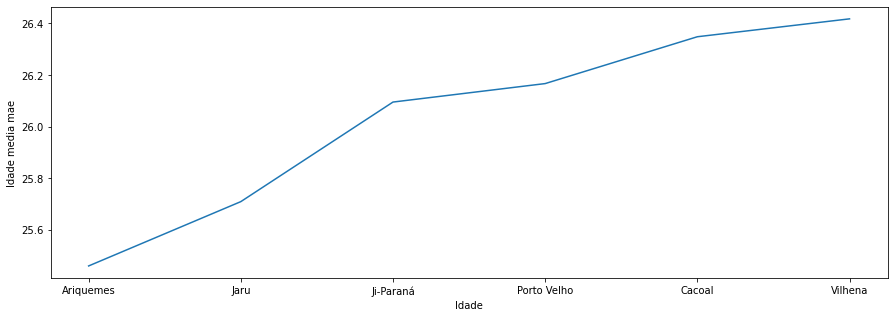

In [49]:
sinasc_exe_4a.groupby(imediatas)['IDADEMAE'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('Idade media mae')
plt.xlabel('Idade');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [50]:
idh = {
    "Candeias do Jamari": "IDH-M medio",
    "Guajará-Mirim": "IDH-M medio",
    "Itapuã do Oeste": "IDH-M medio",
    "Nova Mamoré": "IDH-M baixo",
    "Porto Velho": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Alto Paraíso": "IDH-M medio",
    "Buritis": "IDH-M medio",
    "Cacaulândia": "IDH-M medio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M medio",
    "Monte Negro": "IDH-M medio",
    "Rio Crespo": "IDH-M medio",
    "Jaru": "IDH-M medio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M medio",
    "Costa Marques": "IDH-M medio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M medio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M medio",
    "Presidente Médici": "IDH-M medio",
    "São Francisco do Guaporé": "IDH-M medio",
    "São Miguel do Guaporé": "IDH-M medio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M medio",
    "Urupá": "IDH-M medio",
    "Vale do Paraíso": "IDH-M medio",
    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M medio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M medio",
    "Espigão D'Oeste": "IDH-M medio",
    "Ministro Andreazza": "IDH-M medio",
    "Nova Brasilândia D'Oeste": "IDH-M medio",
    "Novo Horizonte do Oeste": "IDH-M medio",
    "Parecis": "IDH-M medio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M medio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M medio",
    "São Felipe D'Oeste": "IDH-M medio",
    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M medio",
    "Cerejeiras": "IDH-M medio",
    "Chupinguaia": "IDH-M medio",
    "Colorado do Oeste": "IDH-M medio",
    "Corumbiara": "IDH-M medio",
    "Pimenteiras do Oeste": "IDH-M medio"
}

In [51]:
sinasc_exe_5 = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]

In [52]:
sinasc_exe_5a = sinasc_exe_5.set_index('munResNome')
sinasc_exe_5a.groupby(idh).agg([('minimo','min'),('maximo','max'),('media','mean')])

IDADEMAE                   IDADEPAI                  
              minimo maximo      media   minimo maximo      media
munResNome                                                       
IDH-M alto        12     47  26.280332     15.0   70.0  31.074091
IDH-M baixo       13     46  25.326944     16.0   58.0  30.617450
IDH-M medio       11     53  25.884855     16.0   86.0  31.207092

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [53]:
ifdm = {
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento moderado",
    "Ariquemes": "Desenvolvimento moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Buritis": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento moderado"
}

In [54]:
sinasc_exe_6 = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]

In [55]:
sinasc_exe_6a = sinasc_exe_6.set_index('munResNome')
sinasc_exe_6a.groupby(ifdm).agg([('minimo','min'),('maximo','max'),('media','mean')])

IDADEMAE                   IDADEPAI                  
                           minimo maximo      media   minimo maximo      media
munResNome                                                                    
Desenvolvimento moderado       12     53  26.223139     15.0   70.0  31.061687
Desenvolvimento regular        11     52  25.535131     16.0   86.0  31.237509

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [56]:
pib = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "Acima de 100 milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 milhões",
    "Vale do Anari": "Acima de 100 milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 milhões",
    "Vale do Paraíso": "Acima de 100 milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão",
    "Cabixi": "Acima de 100 milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
}

In [57]:
sinasc_exe_7 = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]

In [58]:
sinasc_exe_7a = sinasc_exe_7.set_index('munResNome')
sinasc_exe_7a.groupby(pib).agg([('minimo','min'),('maximo','max'),('media','mean'),('mediana','median')])

IDADEMAE                           IDADEPAI         \
                       minimo maximo      media mediana   minimo maximo   
munResNome                                                                
Acima de 1 Bilhão          12     47  26.265562    26.0     15.0   70.0   
Acima de 100 milhões       12     52  25.662910    25.0     17.0   73.0   
Acima de 200 Milhões       13     44  25.323204    25.0     16.0   55.0   
Acima de 300 Milhões       11     53  25.833511    25.0     16.0   64.0   
Acima de 500 Milhões       13     53  25.782528    25.0     16.0   86.0   
Até 100 Milhões            14     41  26.515081    26.0     17.0   67.0   

                                         
                          media mediana  
munResNome                               
Acima de 1 Bilhão     31.108387    30.0  
Acima de 100 milhões  31.602102    30.0  
Acima de 200 Milhões  30.386441    30.0  
Acima de 300 Milhões  30.183386    29.0  
Acima de 500 Milhões  31.322907    31.0  
Até 100 Milhões       31.585185    30.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

#### Para o índice IFDM, a idade média das mães para o desenvolvimento moderado é maior, e a média dos pais para esse desenvolvimento é menor.
#### Para o índice IDH, também ocorre algo semelhante, a idade média das mães é maior para o IDH-alto, já a idade média dos pais é maior no IDH-médio, e ambos tem idade média menor para o IDH-baixo.
#### Para o índice PIB, a média das mães para um PIB baixo, é a maior.